<p style="background-color:#A435F0;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>EDA Project - Udemy Courses</b></p>

<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Udemy_logo.svg/1200px-Udemy_logo.svg.png" width="300" height="500"/>
</div>

<b>Contains:</b>
<ul>
<li><a href="#import-library">Importing Libraries</a></li>
<li><a href="#loading-dataset">Loading The Dataset</a></li>
<li><a href="#understanding-dataset">Understanding The Dataset</a></li>
<li><a href="#organizing-columns">Organizing Columns</a></li>
<li><a href="#outliers">Detecting Outliers</a></li>
<li><a href="#future-engineering">Future Engineering</a></li>
<li><a href="#data-visualization">Data Visualization</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='import-library'></a>
# <font color='#A435F0'> <b>Importing Libraries</b><font color='black'> 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px

from skimpy import skim

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='loading-dataset'></a>
# <font color='#A435F0'> <b>Loading The Dataset</b><font color='black'> 

In [7]:
df0 = pd.read_csv("udemy_courses_dataset.csv")
df = df0.copy()

In [8]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [9]:
df.sample(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2669,959586,Javascript from Beginner to Advanced Level,https://www.udemy.com/javascript-from-beginner...,True,195,6134,160,50,Beginner Level,6.500000,2016-12-19T14:40:00Z,Web Development
2626,1052304,JavaScript For Beginners : Learn JavaScript Fr...,https://www.udemy.com/javascript-course-for-be...,True,195,11285,102,77,All Levels,5.500000,2017-02-07T17:20:39Z,Web Development
55,358326,Dividend Investing: Build Your Portfolio for a...,https://www.udemy.com/dividend-investing/,True,60,8314,83,47,Beginner Level,4.000000,2015-01-24T06:31:19Z,Business Finance
423,233294,Financial Translation,https://www.udemy.com/financial-translation/,True,20,167,6,29,Beginner Level,1.500000,2014-06-11T17:50:13Z,Business Finance
1277,513782,Removing Backgrounds From Images using Adobe P...,https://www.udemy.com/removing-backgrounds-fro...,True,20,1768,20,14,All Levels,0.683333,2015-06-03T18:11:41Z,Graphic Design


<a id='understanding-dataset'></a>
# <font color='#A435F0'> <b>Understanding The Dataset</b><font color='black'> 

In [11]:
df.shape

(3678, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
course_id,3678.0,675971.963295,343273.156040,8324.0,407692.5,687917.0,961355.50,1282064.0
price,3678.0,66.049483,61.005755,0.0,20.0,45.0,95.00,200.0
num_subscribers,3678.0,3197.150625,9504.117010,0.0,111.0,911.5,2546.00,268923.0
num_reviews,3678.0,156.259108,935.452044,0.0,4.0,18.0,67.00,27445.0
num_lectures,3678.0,40.108755,50.383346,0.0,15.0,25.0,45.75,779.0
content_duration,3678.0,4.094517,6.053840,0.0,1.0,2.0,4.50,78.5


In [14]:
df.describe(include="object").T

,count,unique,top,freq
course_title,3678,3663,Acoustic Blues Guitar Lessons,3
url,3678,3672,https://www.udemy.com/cfa-level-2-quantitative...,2
level,3678,4,All Levels,1929
published_timestamp,3678,3672,2017-07-02T14:29:35Z,2
subject,3678,4,Web Development,1200


In [15]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3678   │ │ int32       │ 5     │                                                          │
│ │ Number of columns │ 12     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ bool        │ 1     │                                                          │
│                                │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ course_id          │   0 │     0 │  676000 │  343300 │  8324 │ 407700 │ 687900 │ 961400 │ 1282000 │ ▅▆▇▇▇▆ │  │
│ │ price              │   0 │     0 │   66.05 │   61.01 │     0 │     20 │     45 │     95 │     200 │ ▇▆▂▁▁▃ │  │
│ │ num_subscribers    │   0 │     0 │    3197 │    9504 │     0 │    111 │  911.5 │   2546 │  268900 │   ▇    │  │
│ │ num_reviews        │   0 │     0 │   156.3 │   935.5 │     0 │      4 │     18 │     67 │   27440 │   ▇    │  │
│ │ num_lectures       │   0 │     0 │   40.11 │   50.38 │     0 │     15 │     25 │  45.75 │     779 │   ▇    │  │
│ │ content_duration   │   0 │     0 │   4.095 │   6.054 │     0 │      1 │      2 │    4.5 │    78.5 │   ▇    │  │
│ └────────────────────┴─────┴───────┴─────────┴─────────┴───────┴────────┴────────┴────────┴─────────┴────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ is_paid                            │            3368 │                          0.92 │       ▁    ▇        │  │
│ └────────────────────────────────────┴─────────────────┴───────────────────────────────┴─────────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ NA    ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ course_title                         │     0 │         0 │                      7.2 │                26418 │  │
│ │ url                                  │     0 │         0 │                        1 │                 3678 │  │
│ │ level                                │     0 │         0 │                        2 │                 7356 │  │
│ │ published_timestamp                  │     0 │      

In [16]:
df.duplicated().sum()

6

In [17]:
df = df.drop_duplicates()

In [18]:
df.duplicated().sum()

0

In [19]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

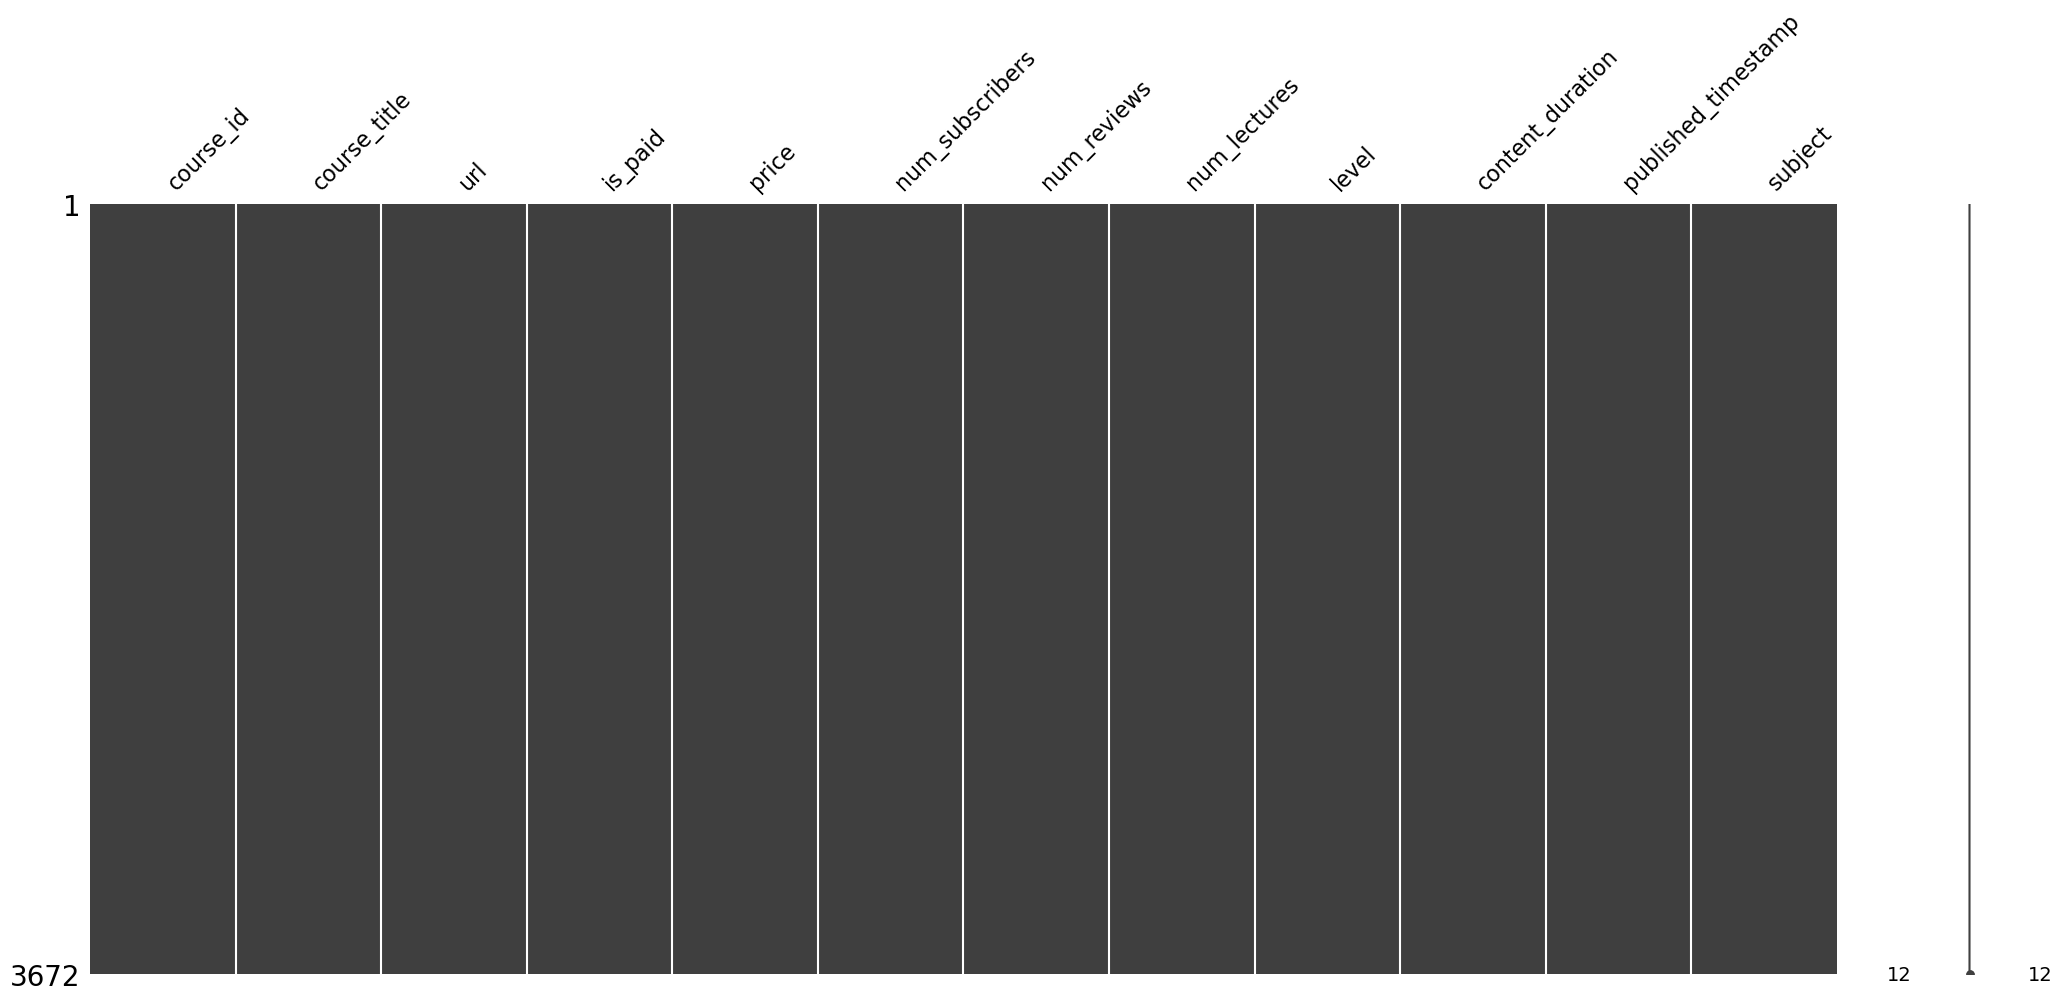

In [20]:
msno.matrix(df);

<a id='organizing-columns'></a>
# <font color='#A435F0'> <b>Organizing Columns</b><font color='black'> 

In [22]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

## <font color='#C17CFA'> <b>"course_title" Column</b><font color='black'> 

In [24]:
df["course_title"] = df["course_title"].str.strip()

## <font color='#C17CFA'> <b>"url" Column</b><font color='black'> 

url column won't be used in this project so we can drop this column from the data set.

In [27]:
df = df.drop('url', axis=1)

In [28]:
df.columns = ['id', 'title', 'paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'duration',
       'published_time', 'subject']

In [29]:
df.columns

Index(['id', 'title', 'paid', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'duration', 'published_time', 'subject'],
      dtype='object')

## <font color='#C17CFA'> <b>"paid" Column</b><font color='black'> 

In [31]:
df.paid.unique()

array([ True, False])

In [32]:
df.paid.dtype

dtype('bool')

## <font color='#C17CFA'> <b>"price" Column</b><font color='black'> 

In [34]:
df.price.unique()

array([200,  75,  45,  95, 150,  65, 195,  30,  20,  50, 175, 140, 115,
       190, 125,  60, 145, 105, 155, 185, 180, 120,  25, 160,  40,   0,
       100,  90,  35,  80,  70,  55, 165, 130,  85, 170, 110, 135],
      dtype=int64)

## <font color='#C17CFA'> <b>"num_reviews" Column</b><font color='black'> 

In [36]:
df.num_reviews.dtype

dtype('int64')

## <font color='#C17CFA'> <b>"num_lectures" Column</b><font color='black'> 

In [38]:
df.num_lectures.dtype

dtype('int64')

## <font color='#C17CFA'> <b>"level" Column</b><font color='black'> 

In [40]:
df.level.unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

## <font color='#C17CFA'> <b>"duration" Column</b><font color='black'> 

In [42]:
df.duration = df.duration.round(2)

## <font color='#C17CFA'> <b>"published_time" Column</b><font color='black'> 

In [44]:
df['published_time'] = df['published_time'].str.replace('T', ' ').str.replace('Z', '')

In [45]:
df['published_time'] = pd.to_datetime(df['published_time'])

In [46]:
# for without time
# df['published_timestamp'] = pd.to_datetime(df['published_timestamp']).dt.date
# df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

In [47]:
df.published_time.dtype

dtype('<M8[ns]')

## <font color='#C17CFA'> <b>"subject" Column</b><font color='black'> 

In [49]:
df.subject.unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

<a id='outliers'></a>
# <font color='#A435F0'> <b>Detecting Outliers</b><font color='black'> 

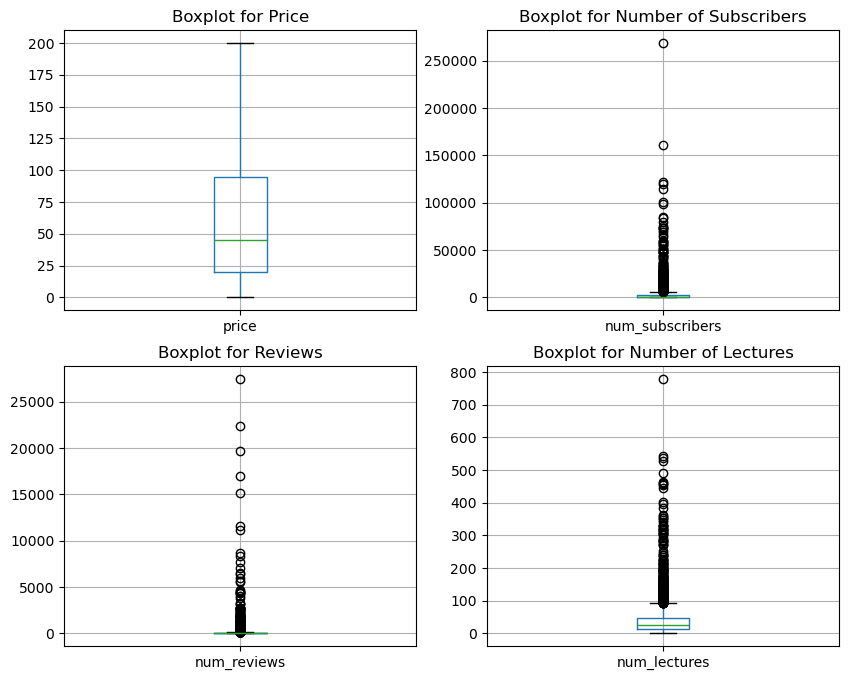

In [51]:
# Create a 2x2 grid for the box plots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Boxplot for 'price'
df.boxplot(column='price', ax=axes[0, 0])
axes[0, 0].set_title('Boxplot for Price')

# Boxplot for 'subscribers'
df.boxplot(column='num_subscribers', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot for Number of Subscribers')

# Boxplot for 'reviews'
df.boxplot(column='num_reviews', ax=axes[1, 0])
axes[1, 0].set_title('Boxplot for Reviews')

# Boxplot for 'buyed'
df.boxplot(column='num_lectures', ax=axes[1, 1])
axes[1, 1].set_title('Boxplot for Number of Lectures')

plt.show()

When we examine the outlier values ​​in the data set, we see that these values ​​are normal. For example, the fact that the course with **the highest number of subscribers** is actually a **FREE** course explains why it has such a high number of subscribers. So, we decided not to delete this outliers because they are meaningful to us and will affect the graphs that will be created during the data visualization section.

<a id='future-engineering'></a>
# <font color='#A435F0'> <b>Future Engineering</b><font color='black'> 

**In this section, we will create new columns using current columns.**

<a id='nan-values'></a>
## <font color='#C17CFA'> <b>Creating "revenue" Column</b><font color='black'> 

In [54]:
df.columns

Index(['id', 'title', 'paid', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'duration', 'published_time', 'subject'],
      dtype='object')

In [55]:
df["revenue"] = df["price"] * df["num_subscribers"]

<a id='nan-values'></a>
## <font color='#C17CFA'> <b>Creating "year" Column</b><font color='black'> 

In [57]:
df["year"] = df["published_time"].dt.year

<a id='nan-values'></a>
## <font color='#C17CFA'> <b>Creating "price_category" Column</b><font color='black'> 

In [59]:
# Low: 0 - 50
# Medium: 51 - 150
# High: 151 and above
labels = ['Low', 'Medium', 'High']
bins = [0, 50, 150, float('inf')] 
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

In [60]:
df.columns

Index(['id', 'title', 'paid', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'duration', 'published_time', 'subject',
       'revenue', 'year', 'price_category'],
      dtype='object')

In [61]:
df = df.reindex(columns=['id', 'title', 'paid', 'price', 'price_category', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'duration', 'published_time', 'year', 'subject',
       'revenue'])

In [62]:
df.sample(5)

,id,title,paid,price,price_category,num_subscribers,num_reviews,num_lectures,level,duration,published_time,year,subject,revenue
1835,925286,Play Piano To-day! - Beginner Piano Lessons Fo...,True,100,Medium,476,16,91,Beginner Level,4.0,2016-11-01 23:35:16,2016,Musical Instruments,47600
2147,131512,Inside Drum Technique,True,50,Medium,406,10,25,All Levels,2.0,2013-12-13 10:01:14,2013,Musical Instruments,20300
2342,245722,Painless Piano!,True,40,Low,353,1,30,Beginner Level,3.5,2014-06-23 14:11:47,2014,Musical Instruments,14120
255,429482,Fundraise the Simplified Way: A Crowdfunding B...,True,35,Low,7,1,19,All Levels,1.0,2015-02-23 04:37:14,2015,Business Finance,245
581,118836,FX Trading for Beginners,True,20,Low,16,0,22,All Levels,1.5,2013-12-01 04:10:23,2013,Business Finance,320


<a id='data-visualization'></a>
# <font color='#A435F0'> <b>Data Visualization</b><font color='black'> 

<a id='nan-values'></a>
## <font color='#C17CFA'> <b>Course Price Distribution</b><font color='black'> 

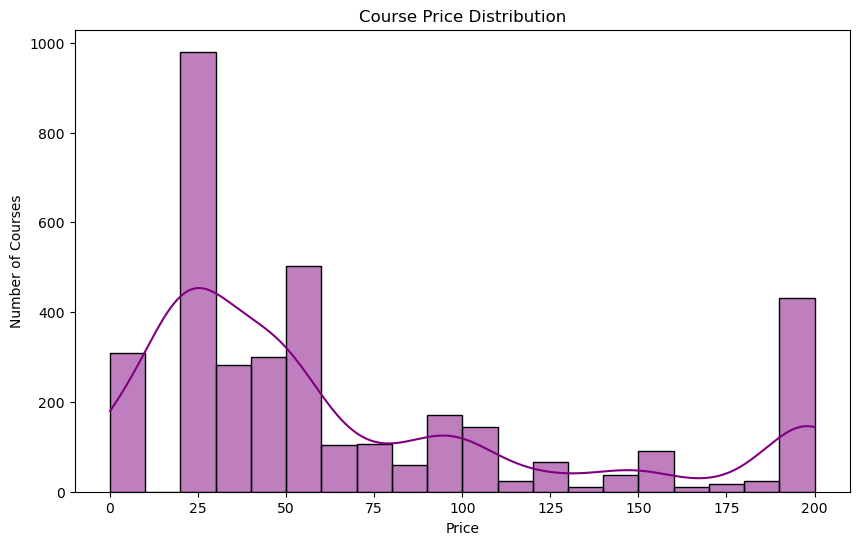

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20, kde=True, color='purple')

plt.title('Course Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Courses')
plt.show()

In [66]:
price_dist = df.price_category.value_counts()
price_dist

price_category
Low       1871
Medium    1228
High       573
Name: count, dtype: int64

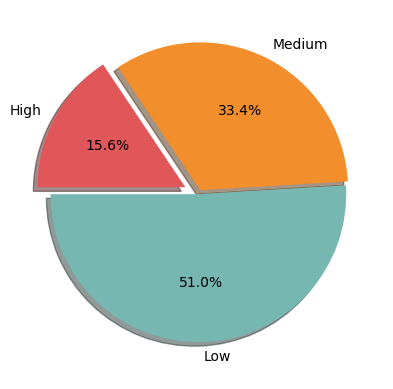

In [67]:
plt.pie(x= price_dist.values,
        labels= price_dist.index,
        autopct="%1.1f%%",
        explode= [0, 0.03, 0.1],
        colors= ["#76b7b2", "#f28e2b", "#e15759"],
        shadow= True,
        startangle= 180
       )

plt.show()

This chart shows the distribution of course prices. Most courses are priced up to 25 USD, with a notable presence of free and low-priced courses. As the price increases, the number of courses decreases. However, a few courses priced at 200 USD indicate that high-priced courses also attract interest.

<a id='nan-values'></a>
## <font color='#C17CFA'> <b>Relationship Between Price and Number of Subscribers</b><font color='black'> 

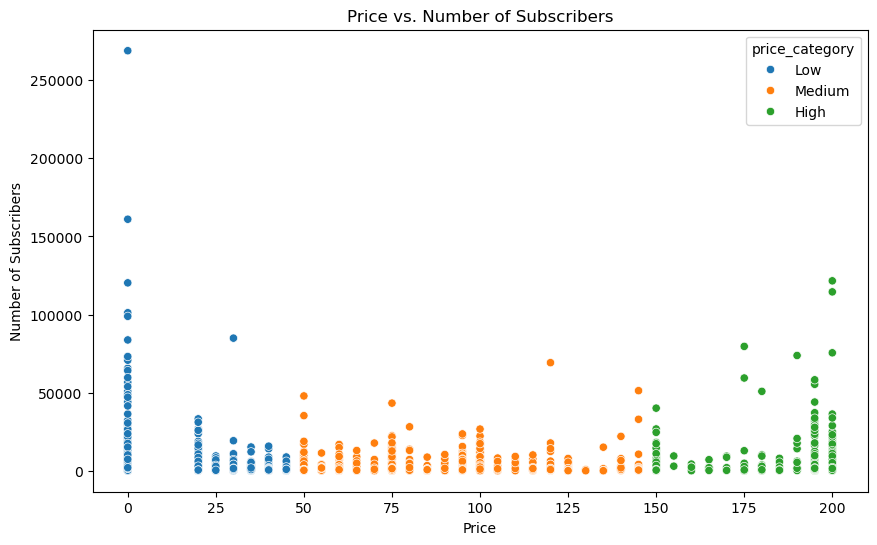

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='num_subscribers', data=df, color='purple', hue= 'price_category')

plt.title('Price vs. Number of Subscribers')
plt.xlabel('Price')
plt.ylabel('Number of Subscribers')

plt.show()

Looking at this graph, we can observe the distribution of subscribers based on Udemy course prices. The main points highlighted by the graph are as follows:

**Overall Trend:**
Low-priced courses (particularly free ones) tend to attract significantly more subscribers. This suggests that affordable pricing has a strong influence on student enrollment. High-priced courses (around $150-$200) show that very few courses are priced at this level, and these courses generally have fewer subscribers, though there are some exceptions.

**Summary:**
 - Low-priced courses, especially those that are free, tend to reach the highest number of subscribers.
 - As the price increases, demand for the courses (in terms of subscriber numbers) generally decreases. However, some high-priced courses in certain categories still manage to attract a considerable number of subscribers.

**This visual clearly illustrates the impact of pricing on subscriber numbers, offering valuable insights for course creators on how to shape their pricing strategies.**

<a id='nan-values'></a>
## <font color='#C17CFA'> <b>Course Level Distribution</b><font color='black'> 

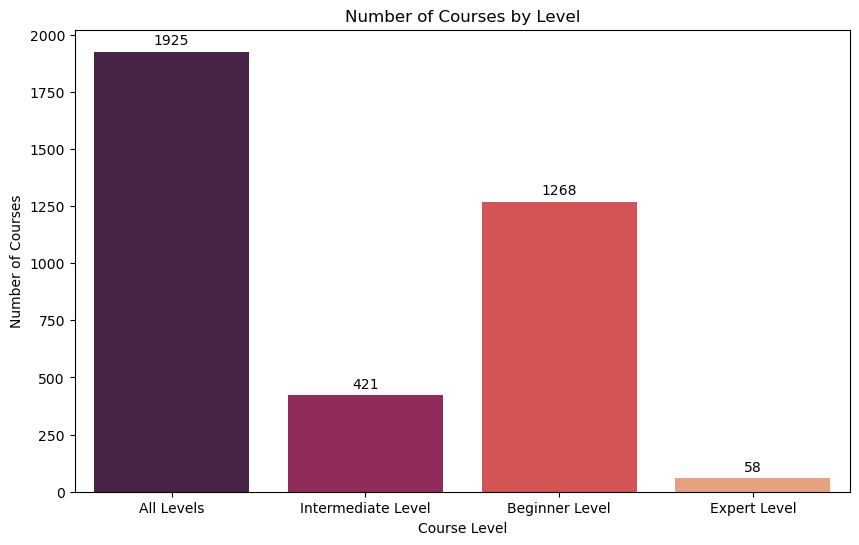

In [120]:
plt.figure(figsize=(10, 6))
ax1 = sns.countplot(x='level', data=df, palette='rocket')

for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black', padding=3)

plt.title('Number of Courses by Level')
plt.xlabel('Course Level')
plt.ylabel('Number of Courses')

plt.show()

The graph shows the distribution of courses by level. The majority of courses are classified under "All Levels" (1925 courses), followed by Beginner Level with 1248 courses. There are very few Expert Level courses (only 36), indicating that most courses are designed to cater to a broader audience.

## <font color='#C17CFA'> <b>Subject-wise Analysis</b><font color='black'> 

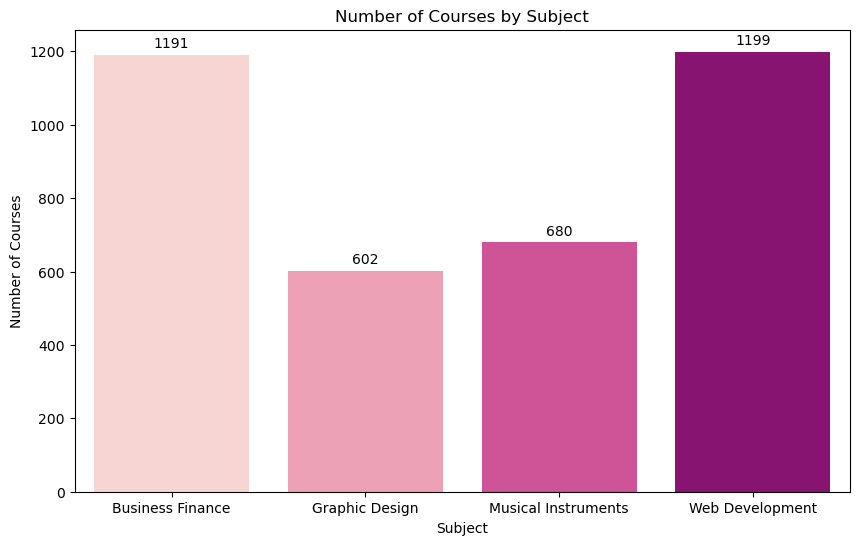

In [122]:
plt.figure(figsize=(10, 6))
ax2 = sns.countplot(x='subject', data=df, palette='RdPu')

for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black', padding=3)

plt.title('Number of Courses by Subject')
plt.xlabel('Subject')
plt.ylabel('Number of Courses')

plt.show()

The graph displays the distribution of courses by subject. **"Business Finance"** and **"Web Development"** stand out as the two categories with the highest number of courses. **The Web Development category**, in particular, has a significantly **higher number of courses** (1199), reflecting the high demand in technology and finance-related fields.

<a id='nan-values'></a>
## <font color='#C17CFA'> <b>Revenue Analysis by Year</b><font color='black'> 

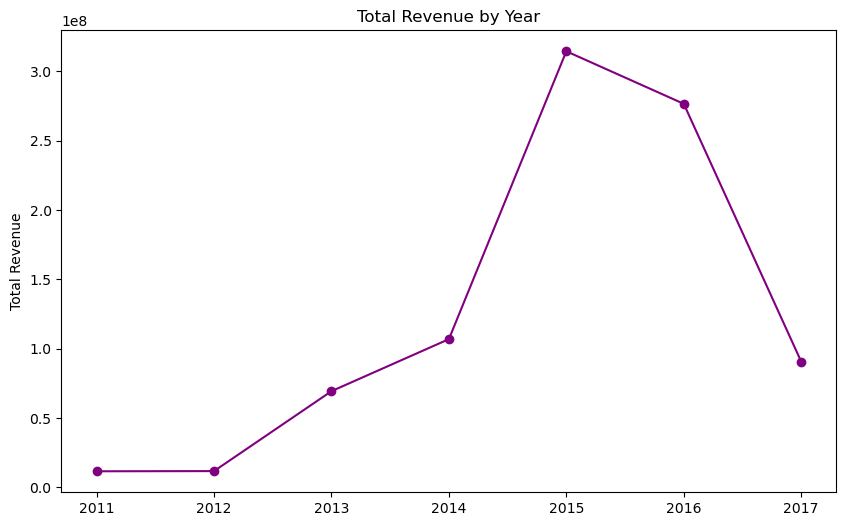

In [126]:
revenue_by_year = df.groupby('year')['revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(revenue_by_year['year'], revenue_by_year['revenue'], marker='o', color='purple')

plt.title('Total Revenue by Year')
plt.ylabel('Total Revenue')

plt.show()

This graph shows the total revenue by year. From 2011 to 2015, there is steady growth in revenue, reaching its peak in 2015. However, after 2015, there is a noticeable decline, and by 2017, revenue drops below the 2014 level. This suggests that after a period of rapid growth, the platform experienced a decline in revenue.

<a id='nan-values'></a>
## <font color='#C17CFA'> <b>Content Duration Analysis</b><font color='black'> 

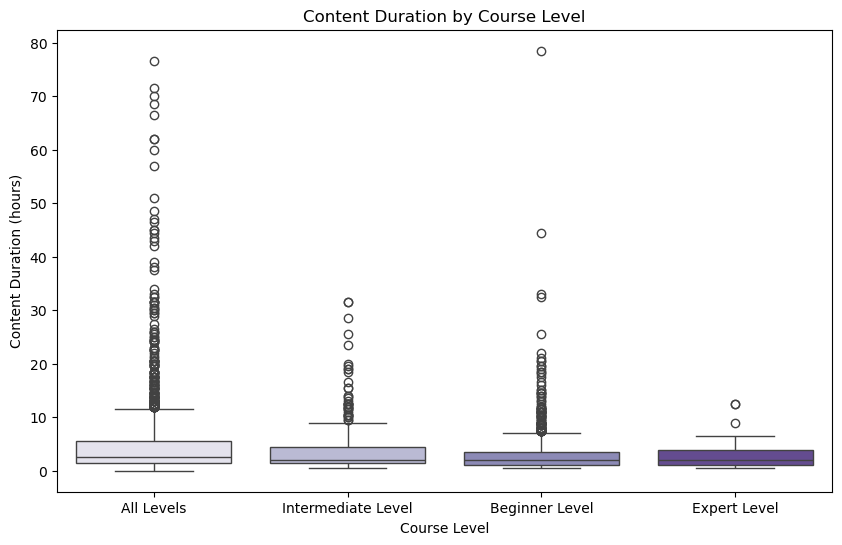

In [292]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='level', y='duration', data=df, palette='Purples')

plt.title('Content Duration by Course Level')
plt.xlabel('Course Level')
plt.ylabel('Content Duration (hours)')

plt.show()

This boxplot shows that:
 - All Levels, Intermediate, and Beginner courses have a similar median duration around 10 hours, with some outliers reaching up to 70-80 hours.
 - Expert Level courses are shorter on average, with a median around 5-7 hours, and fewer outliers reaching 30 hours.

**In summary, most courses, regardless of level, are around 10 hours, but expert-level courses tend to be shorter.**

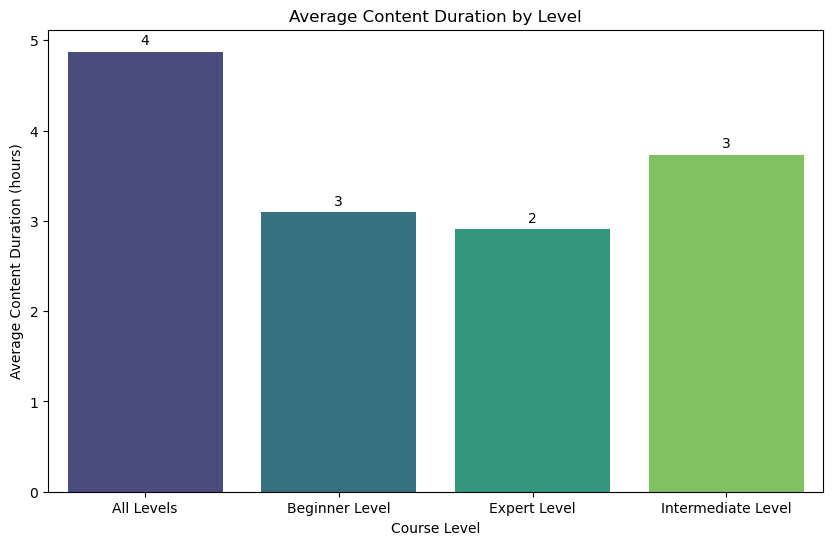

In [128]:
avg_duration_by_level = df.groupby('level')['duration'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax3 = sns.barplot(x='level', y='duration', data=avg_duration_by_level, palette='viridis')

for container in ax3.containers:
    ax3.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black', padding=3)

plt.title('Average Content Duration by Level')
plt.xlabel('Course Level')
plt.ylabel('Average Content Duration (hours)')

plt.show()

This bar chart shows the average content duration (in hours) across different course levels:
 - All Levels courses have the longest average content duration, indicating that these courses are likely designed to cater to a broad audience with comprehensive content.
 - Beginner and Expert Levels have shorter average durations, suggesting that these courses may focus on more specific, foundational, or advanced topics, respectively.
 - The Intermediate Level courses have a slightly longer average duration than Beginner and Expert courses, indicating that they may cover more complex material without being as extensive as "All Levels" courses.

<a id='nan-values'></a>
## <font color='#C17CFA'> <b>Most Popular 10 Courses</b><font color='black'> 

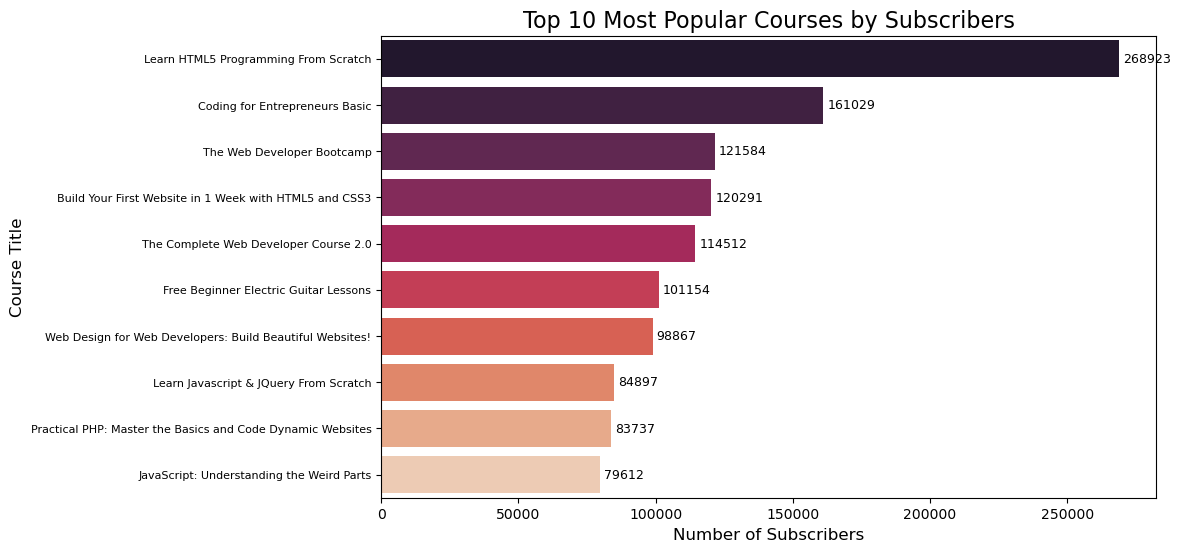

In [132]:
top10_courses = df.sort_values(by='num_subscribers', ascending=False)[:10]

plt.figure(figsize=(10,6))
ax4 = sns.barplot(x='num_subscribers', y='title', data=top10_courses, palette='rocket')

for container in ax4.containers:
    ax4.bar_label(container, fmt='%d', label_type='edge', fontsize=9, color='black', padding=3)

plt.title('Top 10 Most Popular Courses by Subscribers', fontsize=16)
plt.xlabel('Number of Subscribers', fontsize=12)
plt.ylabel('Course Title', fontsize=12)
plt.yticks(fontsize= 8)

plt.show()

This bar chart presents the top 10 most popular Udemy courses based on the number of subscribers.

 - **Learn HTML5 Programming From Scratch** is the most popular course, with over 250,000 subscribers. This highlights the demand for foundational web development skills.
 - Other popular topics include **entrepreneurship basics, web development, and HTML/CSS**, indicating a strong interest in technical and business-related skills.
 - While technical courses dominate the list, it's notable that a non-technical course like Beginner Electric Guitar Lessons also ranks highly, showing diversity in learner interests.

## <font color='#C17CFA'> <b>Relationship Between Number of Lectures and Reviews</b><font color='black'> 

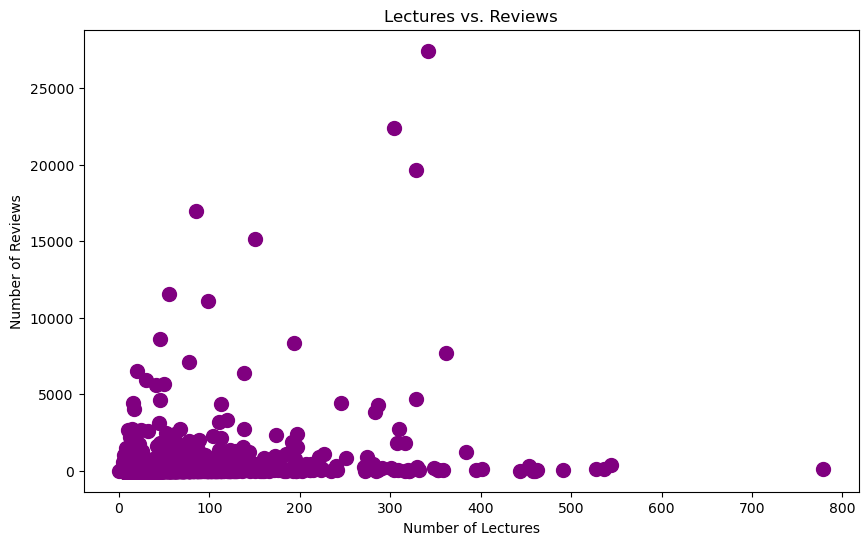

In [414]:
plt.figure(figsize=(10, 6))
plt.scatter(df['num_lectures'], df['num_reviews'], color='purple', s=100)

plt.xlabel('Number of Lectures')
plt.ylabel('Number of Reviews')
plt.title('Lectures vs. Reviews')

plt.show()

This graph shows the relationship between the number of lectures and number of reviews. Courses with fewer lectures, particularly between 0 and 100, tend to have more reviews. However, as the number of lectures increases, there isn't a significant rise in the number of reviews. Courses with over 300 lectures tend to receive fewer reviews, indicating that more content doesn't necessarily lead to more engagement in terms of reviews.

<a id='nan-values'></a>
## <font color='#C17CFA'> <b>Paid vs Free Courses Analysis</b><font color='black'> 

In [372]:
paid_vs_free = df.paid.value_counts()
paid_vs_free.index = ["Paid", "Free"]
paid_vs_free

Paid    3362
Free     310
Name: count, dtype: int64

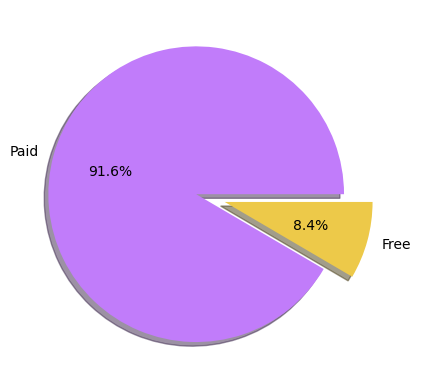

In [387]:
plt.pie(x= paid_vs_free.values,
        labels= paid_vs_free.index,
        autopct= "%1.1f%%",
        explode= [0, 0.2],
        colors= ["#C17CFA", "#EDC949"],
        shadow= True
       )

plt.show()

This pie chart shows the distribution between paid and free courses. It reveals that 91.6% of the courses on Udemy are paid, while only 8.4% are free. This indicates that the platform is primarily focused on paid content, with free courses being a small portion of the total offering.

<a id='nan-values'></a>
## <font color='#C17CFA'> <b>Correlation Analysis</b><font color='black'> 

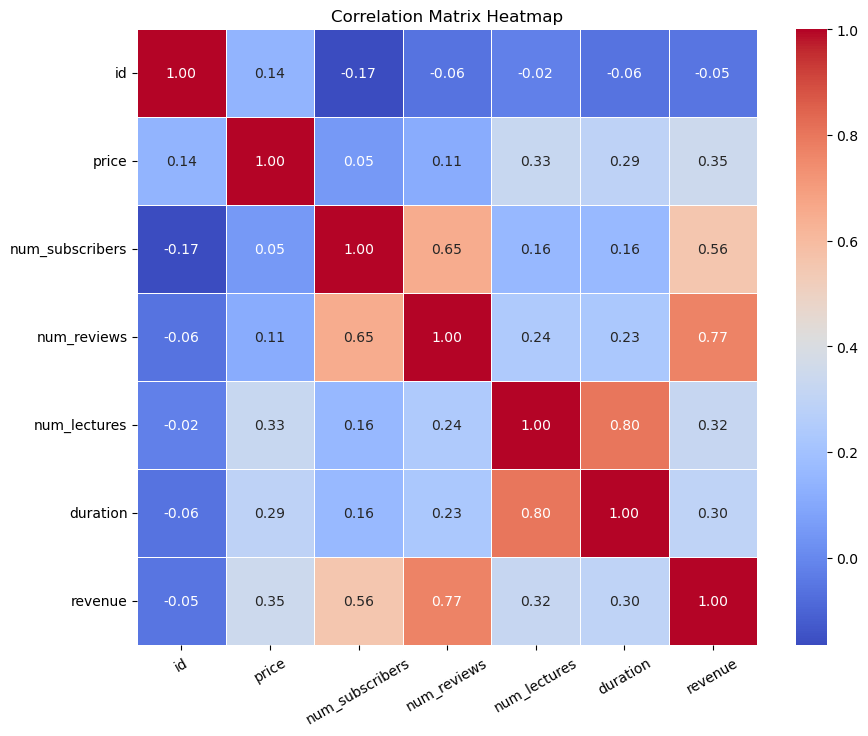

In [407]:
correlation_df = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = correlation_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.7, fmt=".2f")

plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation= 30)

plt.show()

This heatmap shows correlations between variables, where the intensity of the color indicates the strength of the relationship.

**Revenue:**
 - Has a strong positive correlation with number of reviews (0.77), indicating that courses with more reviews tend to generate higher revenue.
 - There is also a positive relationship with number of subscribers (0.56), showing that more subscribers contribute to higher revenue.
 - Number of lectures and duration have weaker positive correlations with revenue (0.32 and 0.30).

**Number of Reviews and Subscribers:**
 - There is a strong correlation between these two variables (0.65), indicating that courses with more subscribers also tend to receive more reviews.

**This chart shows that the number of reviews and subscribers on courses are the biggest contributors to revenue.**

<a id='conclusion'></a>
# <font color='#A435F0'> <b>Conclusion</b><font color='black'> 

**Key Insights:**
 - Most courses are priced low (below 50 USD), and free courses make up a significant portion.
 - Courses focused on technical skills (programming, web development) are the most popular.
 - "All Levels" courses tend to have longer content, while beginner-level courses are shorter.
 - Technical courses generate the highest revenue.

**Trends in Pricing, Popularity, and Revenue:**
 - Low-priced courses attract large audiences, while mid-priced courses are less popular.
 - Free courses have high subscriber counts, but paid technical courses are the main revenue drivers.
 - Revenue growth is most noticeable in technical areas and low-priced courses.

**Potential Improvements:**
 - Optimize pricing by increasing courses in the 10-50 USD range.
 - Balance short modular content with comprehensive long-form courses.
 - Leverage free courses to upsell to paid courses.
 - Enhance course discovery with personalized recommendations and better visibility for niche topics.

**This project was created to conduct analysis for use in developing Udemy's student attraction and revenue growth strategies.**

<p style="background-color:#A435F0;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>THANK YOU!</b></p>